In [1]:
import pandas as pd
import numpy as np
from math import *
from pylab import rcParams
import scipy.stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 16,9

In [2]:
table = pd.read_csv('Detailed_Statistics_Airborne-2.csv', delimiter = ",")

In [3]:
table = table.rename(columns = {'Date (MM/DD/YYYY)': 'Date'})

In [4]:
table.index

RangeIndex(start=0, stop=31120, step=1)

In [5]:
table = table.dropna()

In [6]:
crit = table.loc[table['Date'] == nan].index
table = table.drop(crit)

In [7]:
from datetime import datetime
year = []
month = []
day = []
for i in table.index:
    string = table['Date'][i]
    if(type(string)) != str:
        print(i)
    if (string):
        lst = string.split('/')
        year.append(int(lst[2]))
        if(lst[0][0] == '0'):
            month.append(int(lst[0][1]))
        else:
            month.append(int(lst[0]))
        if(lst[1][0] == '0'):
            day.append(int(lst[1][1]))
        else:
            day.append(int(lst[1]))
table['Year'] = year
table['Month'] = month
table['Day'] = day

In [8]:
table

,Carrier Code,Date,Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Year,Month,Day
1,AA,01/01/2004,1920.0,N442AA,LAX,SFO,74.0,0.0,0.0,32.0,0.0,0.0,2004,1,1
3,AA,01/01/2004,1936.0,N442AA,LAX,SFO,55.0,23.0,0.0,1.0,0.0,11.0,2004,1,1
4,AA,01/01/2004,1942.0,N513AA,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
5,AA,01/01/2004,1950.0,N421AA,LAX,SFO,58.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
6,AA,01/01/2004,1958.0,N513AA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31114,AA,07/02/2020,2511.0,N758US,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0,2020,7,2
31115,AA,07/03/2020,2511.0,N836AW,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2020,7,3
31116,AA,07/04/2020,2511.0,N837AW,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2020,7,4
31117,AA,07/05/2020,2511.0,N764US,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2020,7,5


In [9]:
tables_by_years = {}
for i in range(2004, 2021):
    tables_by_years[i] = table.loc[table['Year'] == i]

In [10]:
tables_by_years[2005]

,Carrier Code,Date,Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Year,Month,Day
2458,AA,01/01/2005,1920.0,N495AA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2005,1,1
2459,AA,01/01/2005,1936.0,N495AA,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2005,1,1
2460,AA,01/01/2005,1950.0,N495AA,LAX,SFO,52.0,18.0,0.0,0.0,0.0,0.0,2005,1,1
2461,AA,01/02/2005,1519.0,N3DCAA,LAX,SFO,66.0,0.0,0.0,131.0,0.0,9.0,2005,1,2
2462,AA,01/02/2005,1920.0,N426AA,LAX,SFO,62.0,0.0,0.0,28.0,0.0,0.0,2005,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,AA,12/30/2005,1976.0,N539AA,LAX,SFO,75.0,0.0,0.0,125.0,0.0,7.0,2005,12,30
4852,AA,12/31/2005,376.0,N461AA,LAX,SFO,61.0,0.0,0.0,0.0,0.0,0.0,2005,12,31
4853,AA,12/31/2005,838.0,N571AA,LAX,SFO,59.0,0.0,0.0,0.0,0.0,0.0,2005,12,31
4854,AA,12/31/2005,1055.0,N278AA,LAX,SFO,117.0,0.0,0.0,84.0,0.0,0.0,2005,12,31


In [11]:
mean_years = []
for i in range(2004, 2021):
    t = []
    t.append(np.mean(tables_by_years[i]['Airborne Time (Minutes)']))
    mean_years.append(np.mean(tables_by_years[i]['Airborne Time (Minutes)']))

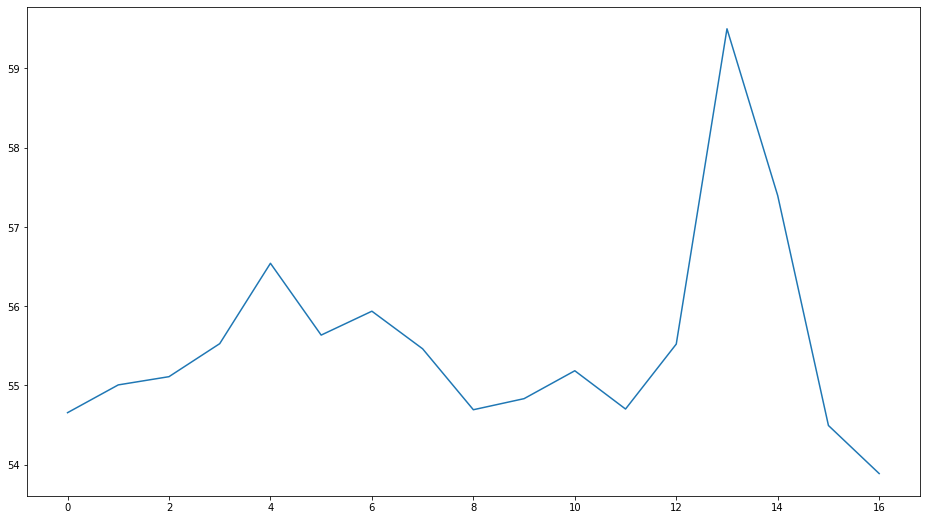

In [12]:
plt.plot(mean_years)

In [13]:
mean_month = {}
for i in range(2004, 2021):
    t = []
    for j in range(12):
        t.append(np.mean(tables_by_years[i].loc[tables_by_years[i]['Month'] == j + 1]['Airborne Time (Minutes)']))
    mean_month[i] = t

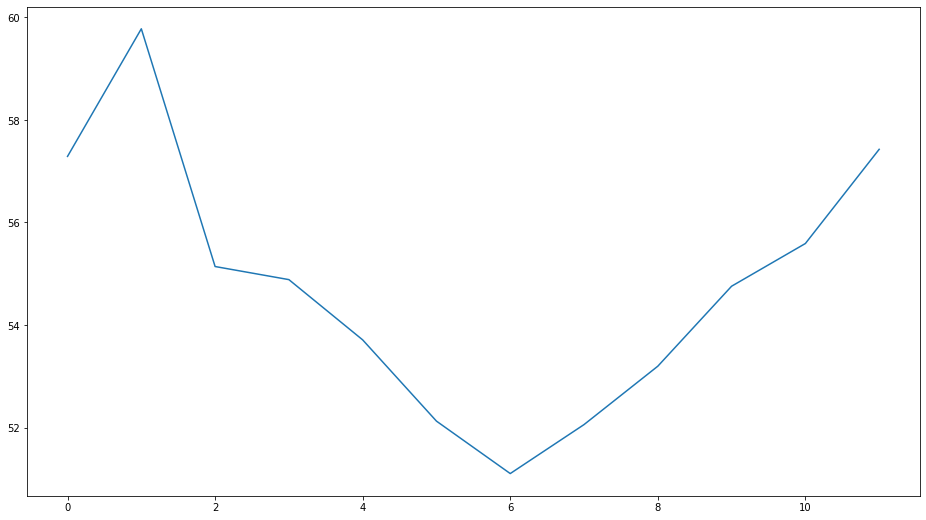

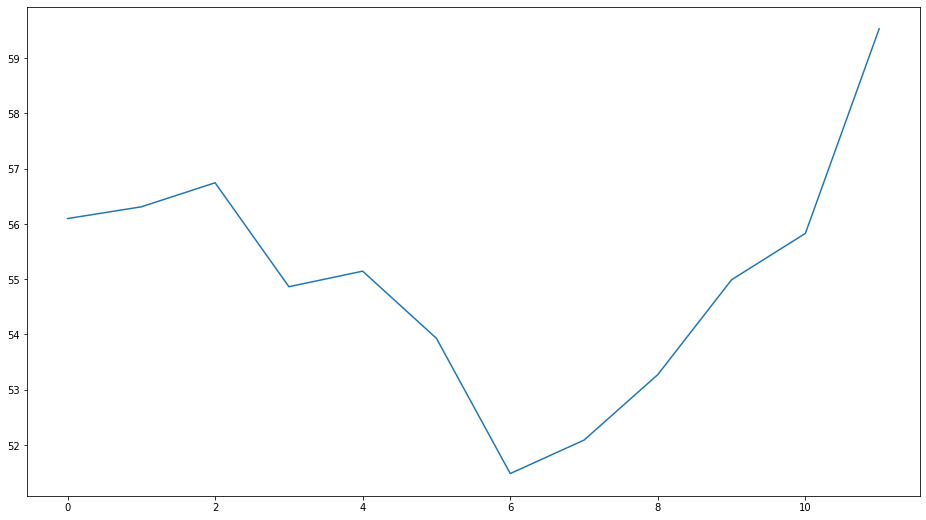

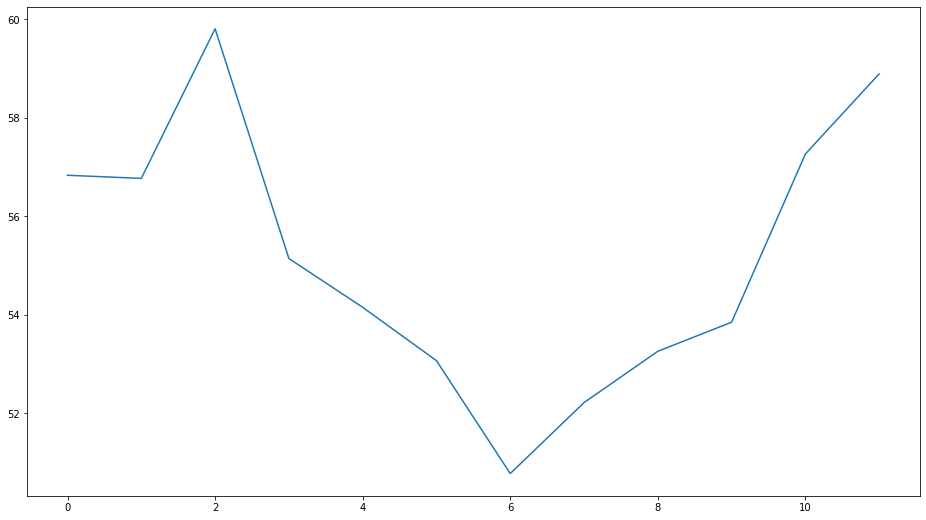

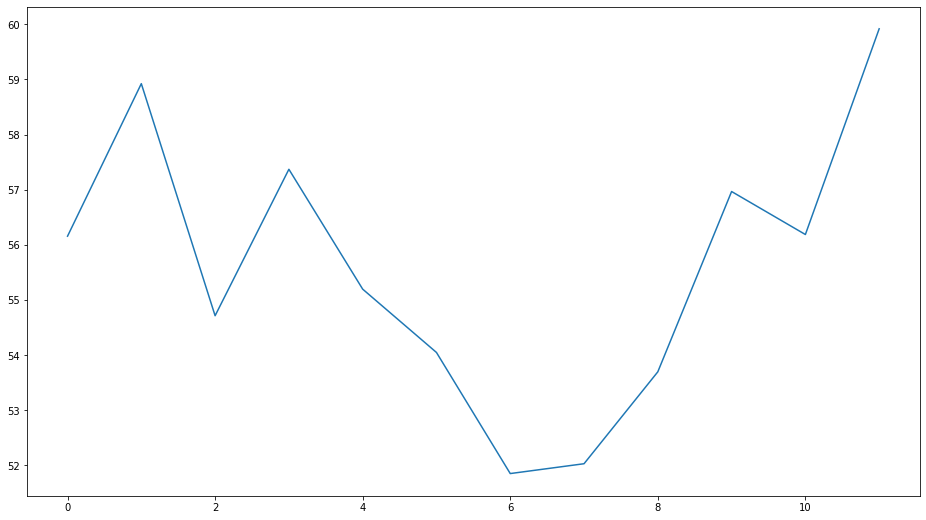

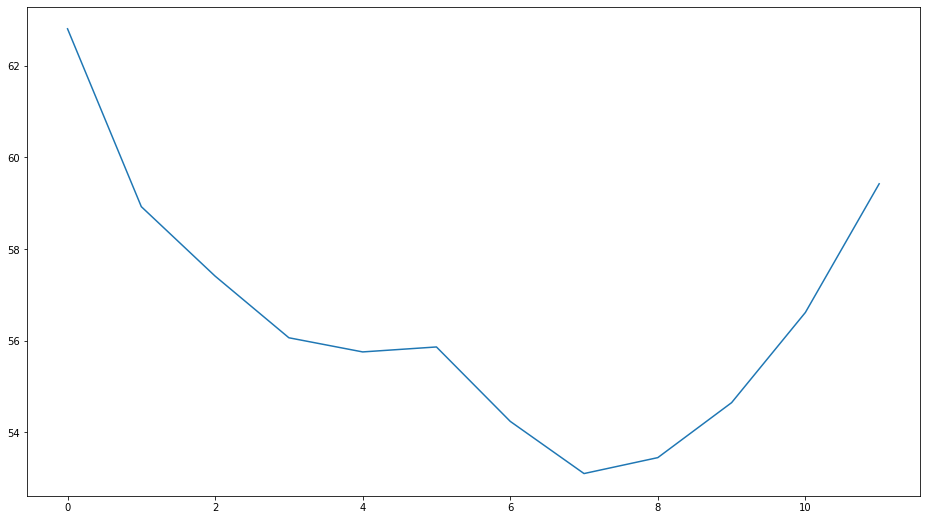

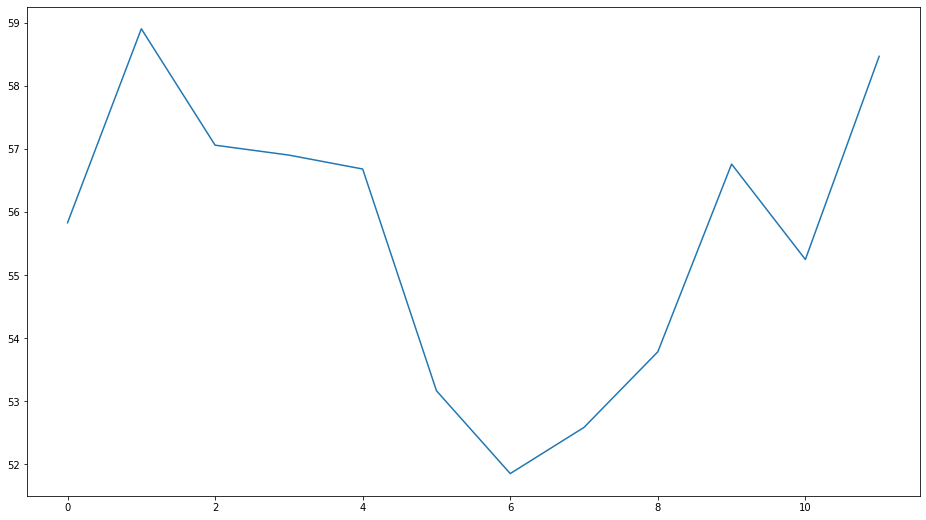

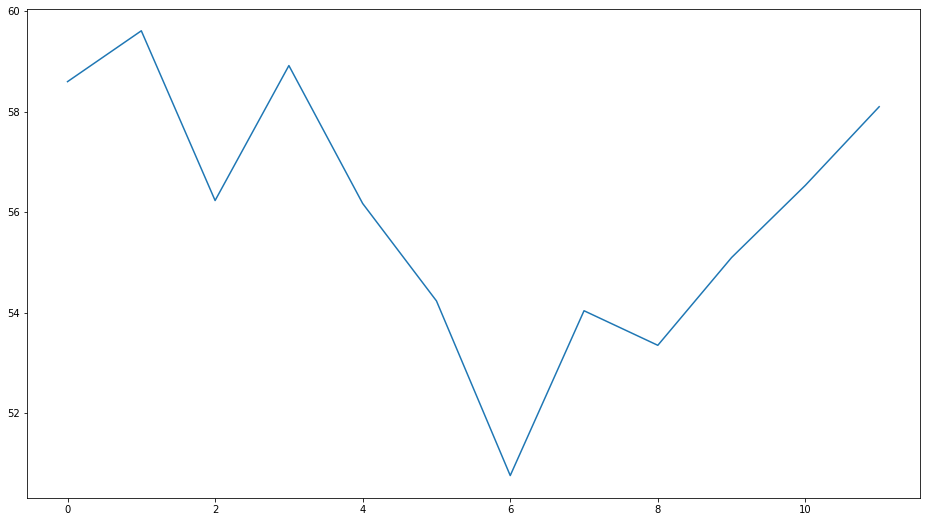

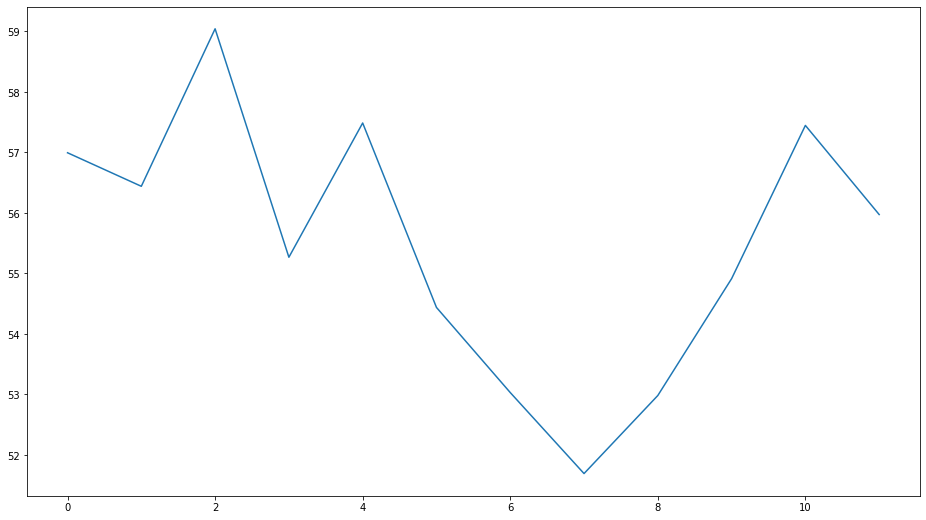

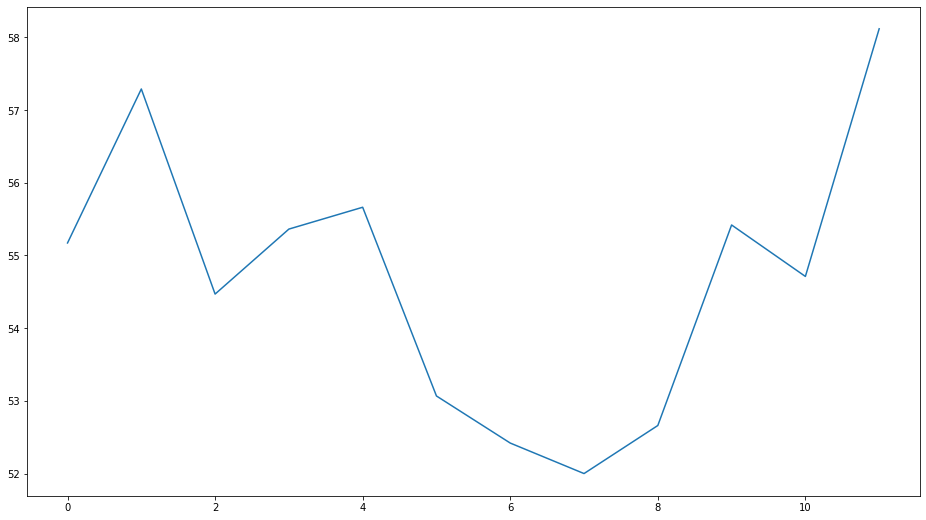

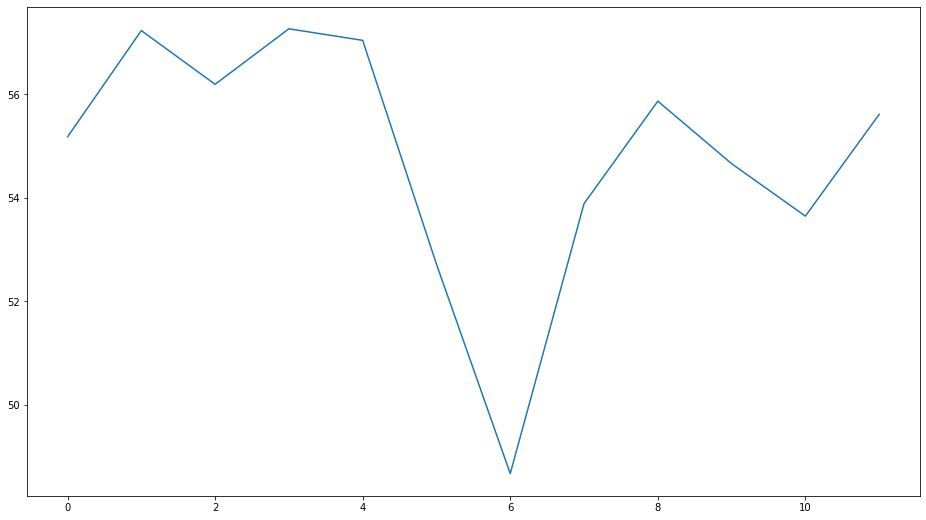

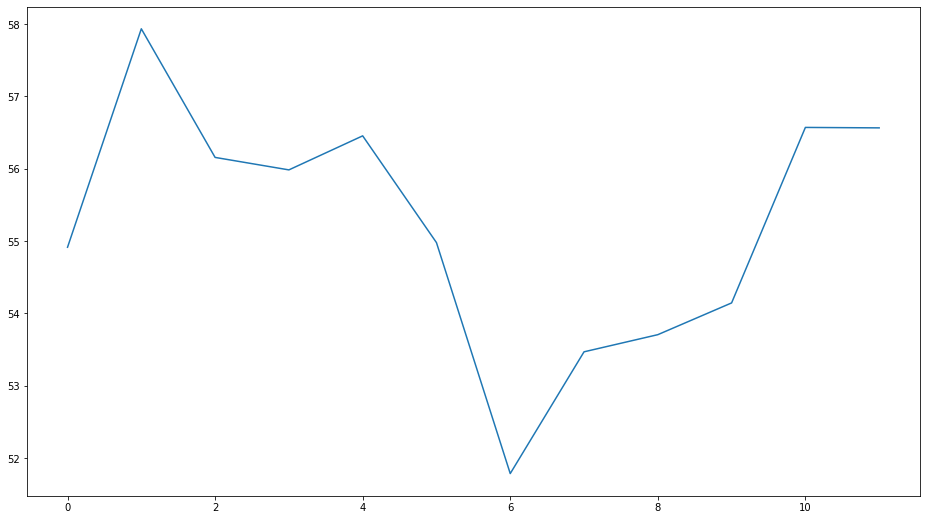

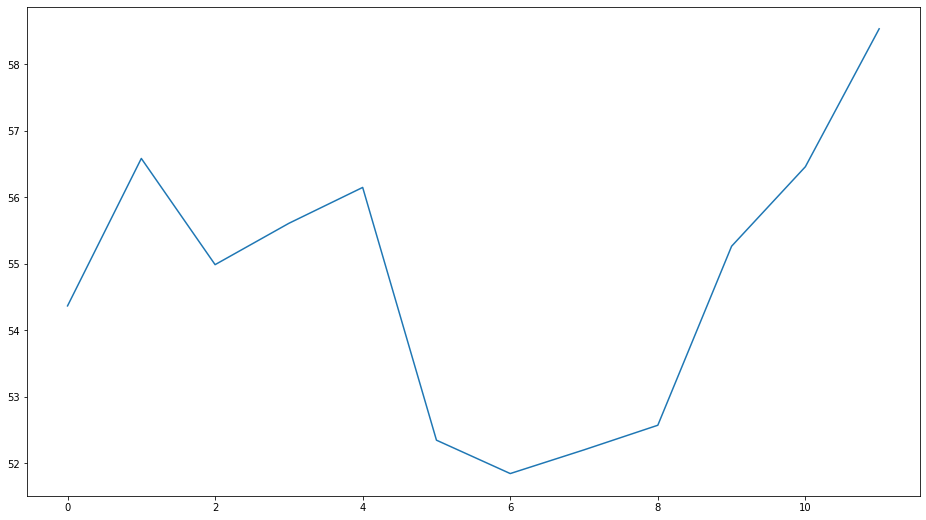

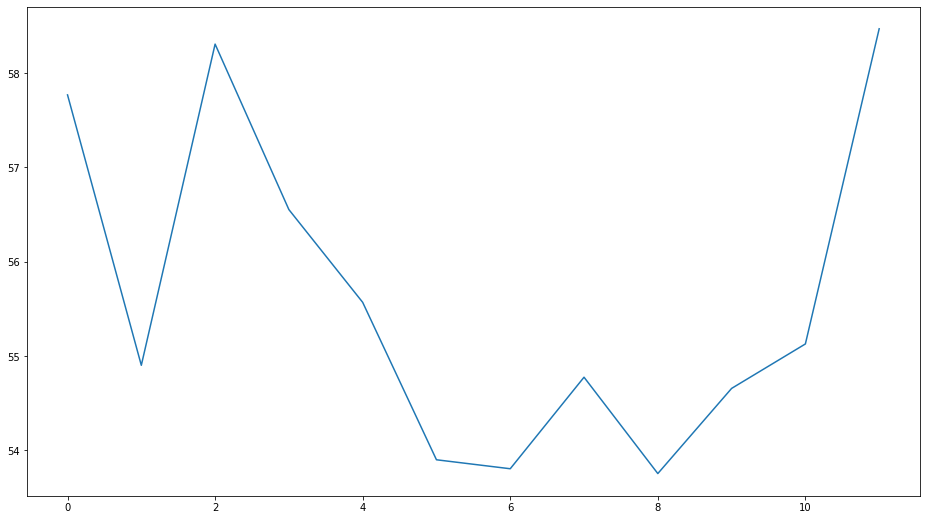

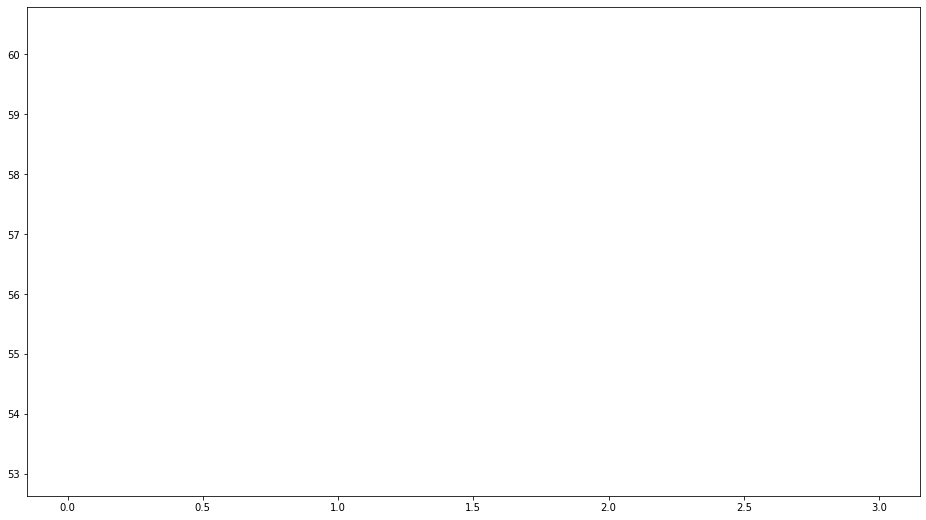

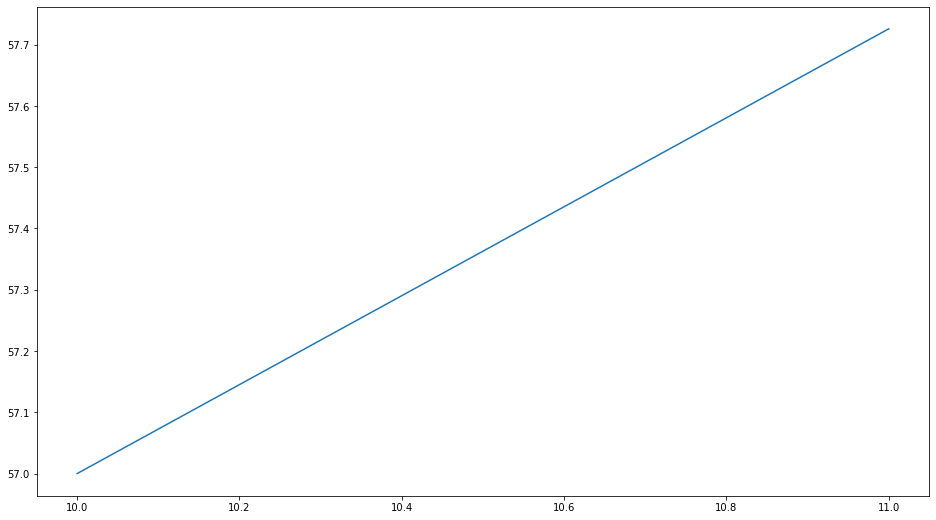

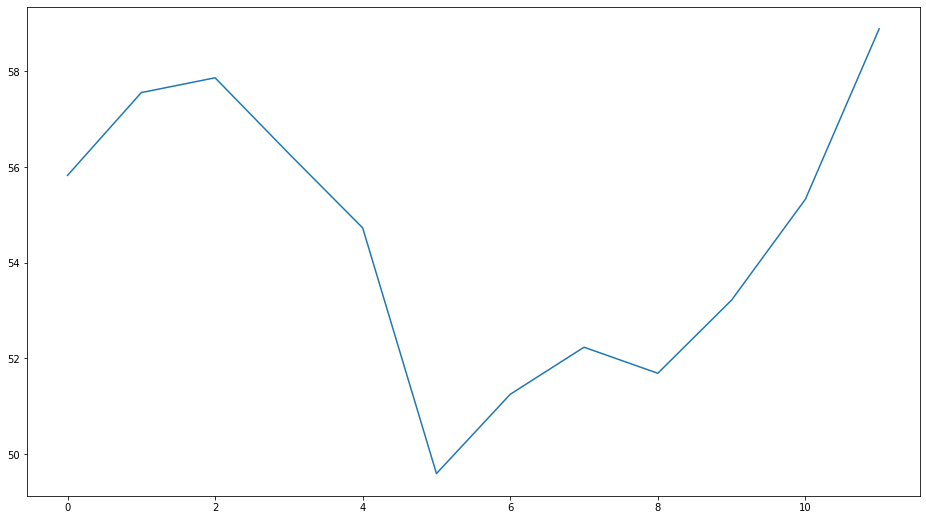

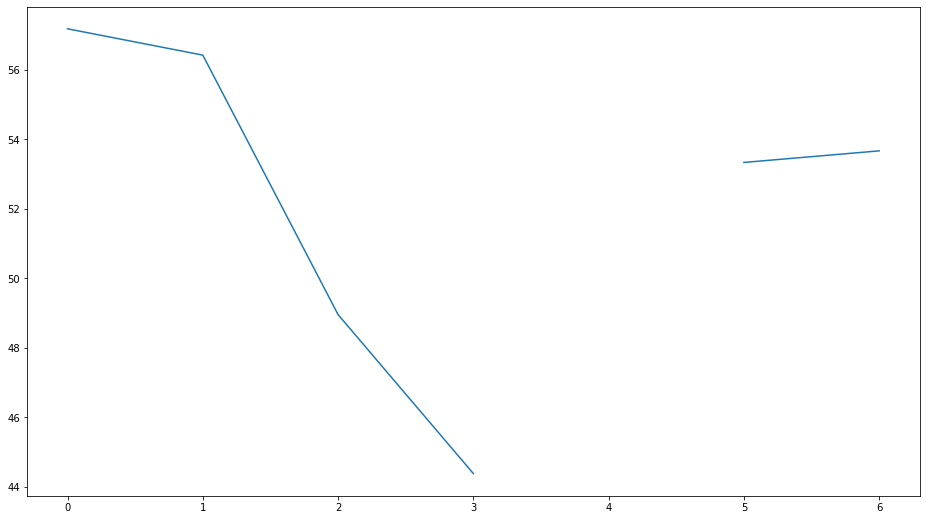

In [14]:
for i in mean_month.keys():
    plt.figure()
    plt.plot(mean_month[i])
    plt.show()#летом меньше чем зимой

In [28]:
table = table.drop(table.loc[table['Airborne Time (Minutes)']==0].index)

In [29]:
tail_numbers = list(set(table['Tail Number'].dropna()))
flight_numbers = list(set(table['Flight_Number'].dropna()))

In [30]:
mean = {}
mean_list = []
mean_by_idx = {}
idx = 0
for obj in flight_numbers:
    if(table.loc[table['Flight_Number'] == obj].shape[0] > 20):
        mean[obj] = np.mean(table.loc[table['Flight_Number'] == obj]['Airborne Time (Minutes)'])
        mean_by_idx[idx] = obj
        idx += 1
        mean_list.append(np.mean(table.loc[table['Flight_Number'] == obj]['Airborne Time (Minutes)']))

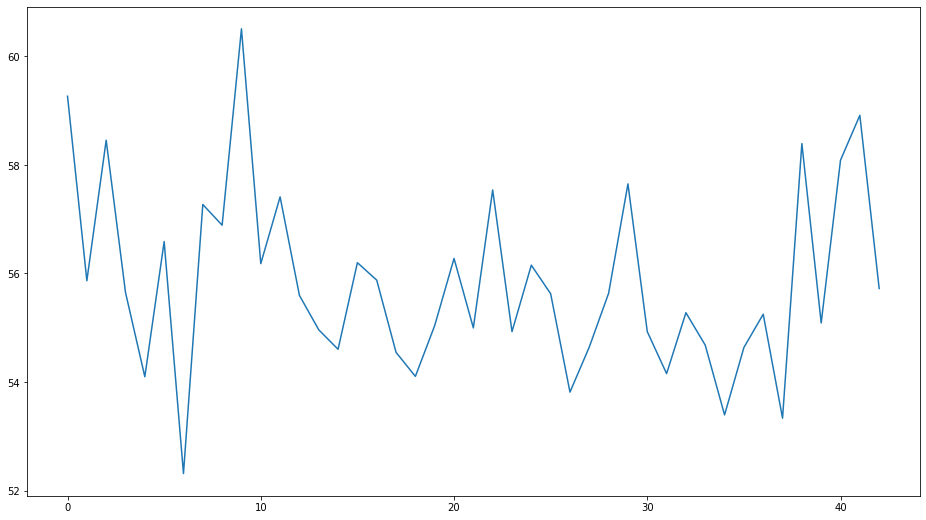

In [31]:
plt.plot(mean_list[60:])

In [32]:
mean_list[66]

52.31277533039648

In [33]:
mean_by_idx[66]

2431.0

In [34]:
table.loc[table['Flight_Number'] == 2431]

,Carrier Code,Date,Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Year,Month,Day
5453,AA,04/03/2006,2431.0,N425AA,LAX,SFO,59.0,0.0,0.0,0.0,0.0,0.0,2006,4,3
5460,AA,04/04/2006,2431.0,N460AA,LAX,SFO,62.0,0.0,0.0,0.0,0.0,0.0,2006,4,4
5467,AA,04/05/2006,2431.0,N454AA,LAX,SFO,65.0,0.0,0.0,0.0,0.0,0.0,2006,4,5
5474,AA,04/06/2006,2431.0,N537AA,LAX,SFO,53.0,8.0,0.0,0.0,0.0,28.0,2006,4,6
5481,AA,04/07/2006,2431.0,N578AA,LAX,SFO,63.0,11.0,0.0,9.0,0.0,1.0,2006,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17998,AA,08/18/2011,2431.0,N567AA,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0,2011,8,18
18004,AA,08/19/2011,2431.0,N4WMAA,LAX,SFO,50.0,0.0,0.0,0.0,0.0,0.0,2011,8,19
18010,AA,08/20/2011,2431.0,N438AA,LAX,SFO,50.0,0.0,0.0,0.0,0.0,0.0,2011,8,20
18016,AA,08/21/2011,2431.0,N596AA,LAX,SFO,52.0,0.0,0.0,0.0,0.0,0.0,2011,8,21


In [35]:
table.loc[table['Flight_Number'] == 1922]

,Carrier Code,Date,Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Year,Month,Day
15007,AA,04/06/2010,1922.0,N3DXAA,LAX,SFO,57.0,147.0,0.0,4.0,0.0,0.0,2010,4,6
15013,AA,04/07/2010,1922.0,N3DRAA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2010,4,7
15019,AA,04/08/2010,1922.0,N3EDAA,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2010,4,8
15025,AA,04/09/2010,1922.0,N3FBAA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2010,4,9
15031,AA,04/10/2010,1922.0,N3FBAA,LAX,SFO,64.0,0.0,0.0,133.0,0.0,0.0,2010,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15361,AA,06/04/2010,1922.0,N3FLAA,LAX,SFO,55.0,0.0,0.0,0.0,0.0,0.0,2010,6,4
15367,AA,06/05/2010,1922.0,N3ELAA,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0,2010,6,5
15373,AA,06/06/2010,1922.0,N3FHAA,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2010,6,6
15379,AA,06/07/2010,1922.0,N3EHAA,LAX,SFO,63.0,0.0,0.0,68.0,0.0,0.0,2010,6,7


In [36]:
table.loc[table['Tail Number'] == 'N945AN']

,Carrier Code,Date,Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Year,Month,Day
30571,AA,12/18/2019,2891.0,N945AN,LAX,SFO,71.0,0.0,0.0,0.0,0.0,0.0,2019,12,18


In [37]:
months2004 = []
for i in range(12):months2004.append(np.mean(table2004.loc[table2004['Month'] ==]['Airborne Time (Minutes)']))
    

SyntaxError: invalid syntax (<ipython-input-37-c5cc11b31d5f>, line 2)

In [180]:
months2004

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
plt.plot(2004)

In [38]:
crit = table.loc[table['Airborne Time (Minutes)'] == 0].index

In [39]:
table = table.drop(crit)

In [40]:
table

,Carrier Code,Date,Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Year,Month,Day
1,AA,01/01/2004,1920.0,N442AA,LAX,SFO,74.0,0.0,0.0,32.0,0.0,0.0,2004,1,1
3,AA,01/01/2004,1936.0,N442AA,LAX,SFO,55.0,23.0,0.0,1.0,0.0,11.0,2004,1,1
4,AA,01/01/2004,1942.0,N513AA,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
5,AA,01/01/2004,1950.0,N421AA,LAX,SFO,58.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
6,AA,01/01/2004,1958.0,N513AA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31114,AA,07/02/2020,2511.0,N758US,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0,2020,7,2
31115,AA,07/03/2020,2511.0,N836AW,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2020,7,3
31116,AA,07/04/2020,2511.0,N837AW,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2020,7,4
31117,AA,07/05/2020,2511.0,N764US,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2020,7,5


In [27]:
airb_time = np.array(table['Airborne Time (Minutes)'])

In [31]:
table = table.rename(columns = {'Date (MM/DD/YYYY)': 'Date'})

In [33]:
table

,Carrier Code,Date,Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
1,AA,01/01/2004,1920.0,N442AA,LAX,SFO,74.0,0.0,0.0,32.0,0.0,0.0
3,AA,01/01/2004,1936.0,N442AA,LAX,SFO,55.0,23.0,0.0,1.0,0.0,11.0
4,AA,01/01/2004,1942.0,N513AA,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0
5,AA,01/01/2004,1950.0,N421AA,LAX,SFO,58.0,0.0,0.0,0.0,0.0,0.0
6,AA,01/01/2004,1958.0,N513AA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31114,AA,07/02/2020,2511.0,N758US,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0
31115,AA,07/03/2020,2511.0,N836AW,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0
31116,AA,07/04/2020,2511.0,N837AW,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0
31117,AA,07/05/2020,2511.0,N764US,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0


In [359]:
table_for_regression = table.copy(deep = True)

In [360]:
table_for_regression

,Carrier Code,Date,Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Year,Month,Day
1,AA,01/01/2004,1920.0,N442AA,LAX,SFO,74.0,0.0,0.0,32.0,0.0,0.0,2004,1,1
3,AA,01/01/2004,1936.0,N442AA,LAX,SFO,55.0,23.0,0.0,1.0,0.0,11.0,2004,1,1
4,AA,01/01/2004,1942.0,N513AA,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
5,AA,01/01/2004,1950.0,N421AA,LAX,SFO,58.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
6,AA,01/01/2004,1958.0,N513AA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2004,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31114,AA,07/02/2020,2511.0,N758US,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0,2020,7,2
31115,AA,07/03/2020,2511.0,N836AW,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2020,7,3
31116,AA,07/04/2020,2511.0,N837AW,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,2020,7,4
31117,AA,07/05/2020,2511.0,N764US,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,2020,7,5


In [361]:
del table_for_regression['Origin Airport']

In [362]:
del table_for_regression['Destination Airport']

In [363]:
del table_for_regression['Delay Carrier (Minutes)']
del table_for_regression['Delay Weather (Minutes)']
del table_for_regression['Delay National Aviation System (Minutes)']
del table_for_regression['Delay Security (Minutes)']
del table_for_regression['Delay Late Aircraft Arrival (Minutes)']

In [346]:
tfr = table_for_regression

In [364]:
tfr.loc[4]

Carrier Code                       AA
Date                       01/01/2004
Flight_Number                    1942
Tail Number                    N513AA
Airborne Time (Minutes)            57
Year                             2004
Month                               1
Day                                 1
Name: 4, dtype: object

In [368]:
months = {}
months[1] = []
months[2] = []
months[3] = []
months[4] = []
months[5] = []
months[6] = []
months[7] = []
months[8] = []
months[9] = []
months[10] = []
months[11] = []
months[12] = []

for index in tfr.index:
    _month = tfr.loc[index]['Month']
    for val in range(1,13):
        if (val == _month):
            months[val].append(1)
        else:
            months[val].append(0)
        

In [378]:
res = np.column_stack([months[i] for i in range(1,13)])

In [385]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge

In [408]:
model1 = LinearRegression()
model2 = LogisticRegression()
model3 = Ridge()

In [409]:
Y = np.array(table['Airborne Time (Minutes)'])

In [427]:
model1 = model1.fit(res[:525], Y[:525])

In [428]:
model1.score(res, Y)

-4.812881514213289e+28

In [429]:
model1.coef_

array([1.60990441e+15, 1.60990441e+15, 1.60990441e+15, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [419]:
res.shape

(30632, 12)

In [430]:
pip install copulas

     |████████████████████████████████| 49 kB 621 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


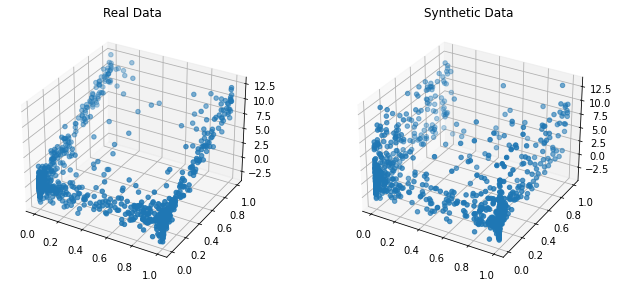

In [434]:
import warnings
warnings.filterwarnings('ignore')

from copulas.datasets import sample_trivariate_xyz
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d

# Load a dataset with 3 columns that are not independent
real_data = sample_trivariate_xyz()


# Fit a gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(real_data)

# Sample synthetic data
synthetic_data = copula.sample(len(real_data))

# Plot the real and the synthetic data to compare
compare_3d(real_data, synthetic_data)

In [439]:
pip install copula

Note: you may need to restart the kernel to use updated packages.


In [440]:
from copula import pyCopula
data = [[2,1,2,4],[3,1,7,4],[2,9,1,0],[3,6,1,6] ]
cop = pyCopula.Copula(data)
samples = cop.gendata(3)
print(samples)

[[3.0, 5.52639402250761, 2.3560281771265084, 5.198270862901162], [2.5214396827112853, 1.0, 1.7821409565070332, 4.299113253651447], [3.0, 4.095740414014669, 5.396937102424988, 3.8082550496142127]]


In [461]:
time = np.array(table['Airborne Time (Minutes)'], dtype = int)
delay = np.array(table['Delay National Aviation System (Minutes)'], dtype = int)

In [463]:
time

array([74, 55, 57, ..., 53, 54, 57])

In [473]:
t = np.array((30632,2), dtype = float)
idx = 0
for obj1, obj2 in zip(time, delay):
    print(obj1)
    t[idx][0] = int(obj1)
    t[idx][1] = int(obj2)
    idx += 1

74


TypeError: 'numpy.float64' object does not support item assignment

In [465]:
data = np.array((2, 30632))

In [466]:
data = pd.DataFrame({'time': time, 'delay': delay})

In [467]:
cop = pyCopula.Copula(np.concatenate(time, delay))

TypeError: only integer scalar arrays can be converted to a scalar index